In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importing dataset
dataset = pd.read_csv('diabetes.csv')

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Dimensions: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies           

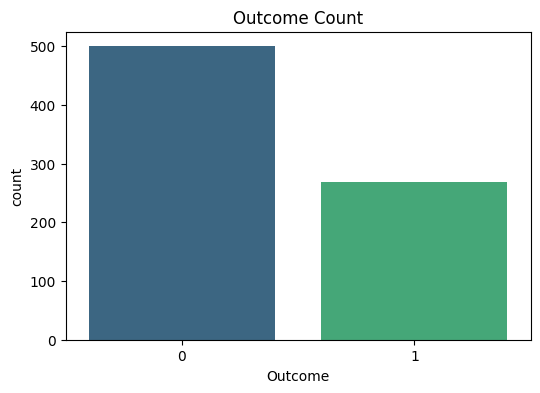

In [4]:
# Preview data
print("Dataset Preview:")
print(dataset.head())

# Dataset dimensions - (rows, columns)
print(f"\nDataset Dimensions: {dataset.shape}")

# Features data-type
print("\nDataset Info:")
dataset.info()

# Statistical summary
print("\nStatistical Summary:")
print(dataset.describe().T)

# Count of null values
print("\nNull Values Count:")
print(dataset.isnull().sum())

# Outcome countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset, palette='viridis')
plt.title("Outcome Count")
plt.show()

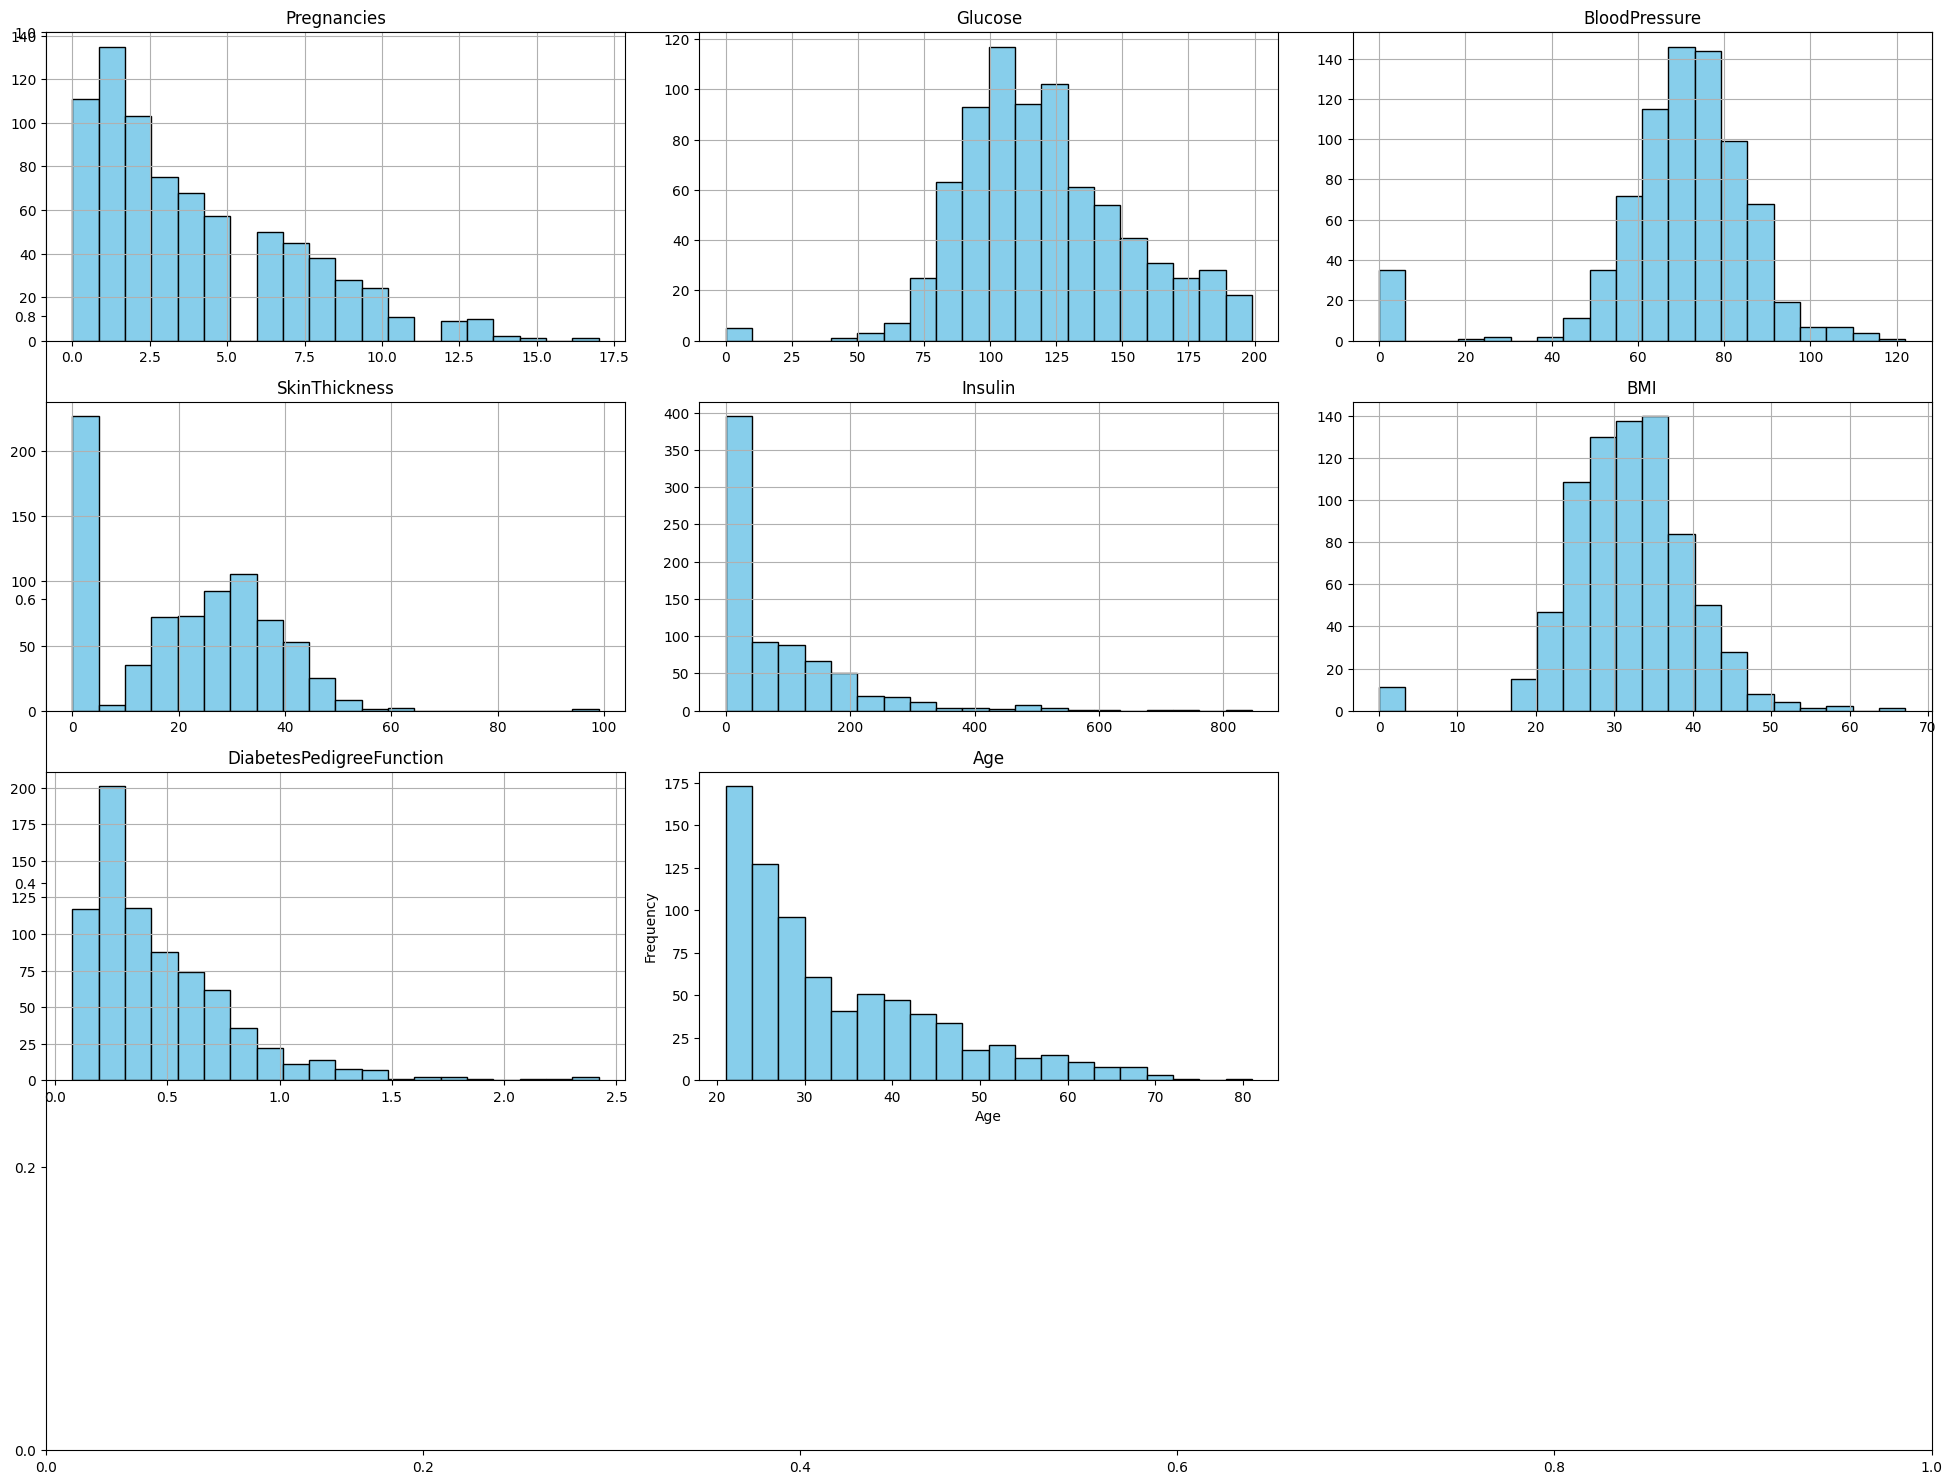

In [5]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length // 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    dataset[i].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(i)
plt.xlabel(i)
plt.ylabel("Frequency")
plt.grid(False)
plt.tight_layout()
plt.show()

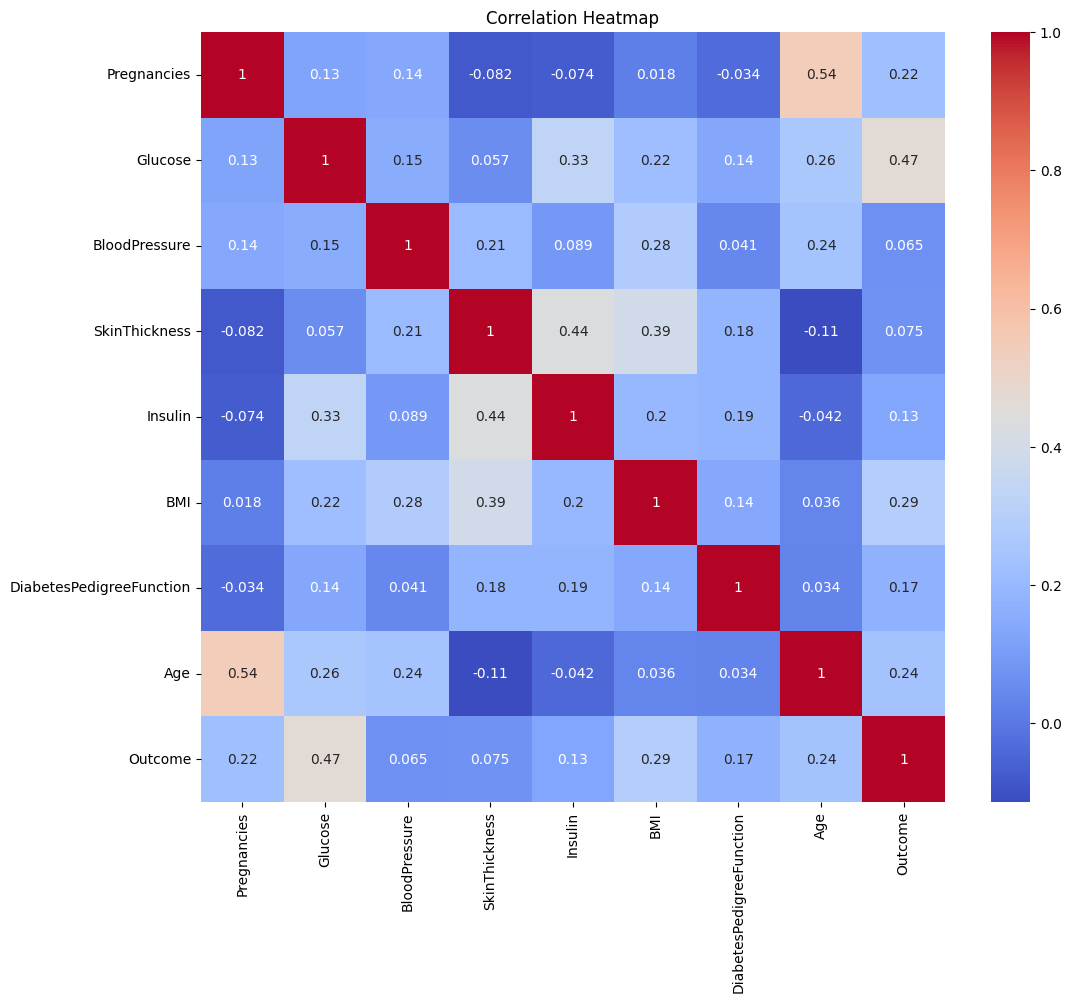

In [6]:
# Correlation heatmap
plt.figure(figsize=(4, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# Handling missing values - replacing zeros with NaN for specific columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    dataset[col] = dataset[col].replace(0, np.nan)

# Checking for missing values again
print("\nNull Values Count After Replacing Zeros:")
print(dataset.isnull().sum())

# Filling missing values with mean
for col in columns_to_replace:
    dataset[col].fillna(dataset[col].mean(), inplace=True)

# Verifying no missing values remain
print("\nNull Values Count After Filling Missing Values:")
print(dataset.isnull().sum())


Null Values Count After Replacing Zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Null Values Count After Filling Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Splitting dataset into training and test set
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-2]
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test)


Logistic Regression Accuracy: 68.83%


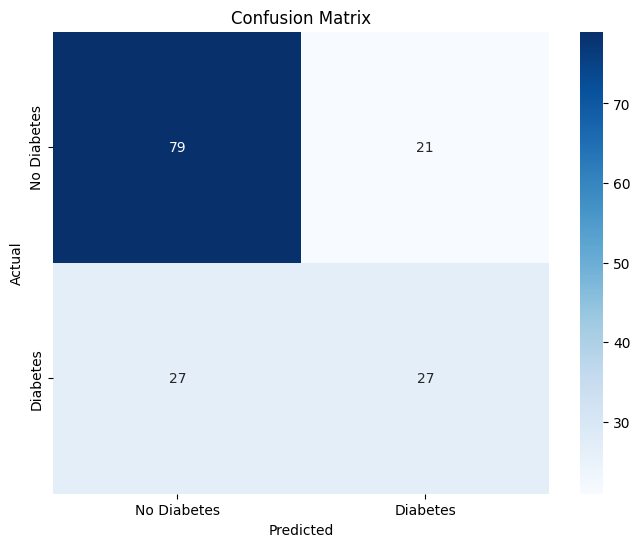


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.56      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nLogistic Regression Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

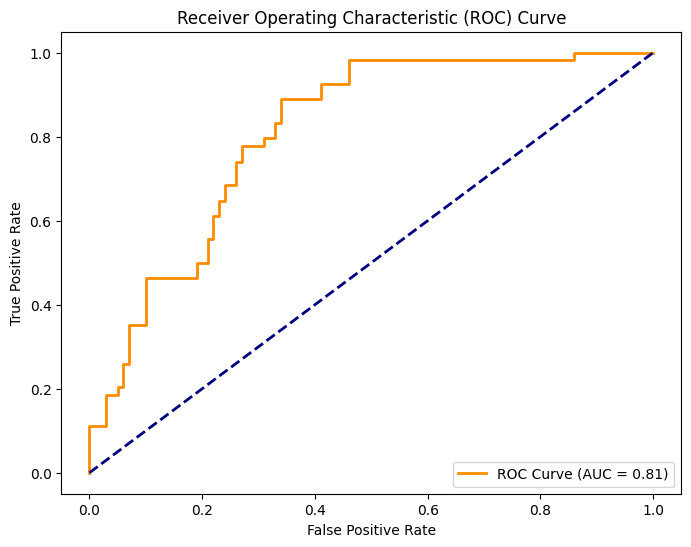

In [12]:
# ROC Curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [13]:
# Random Forest model for comparison
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Random Forest accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"\nRandom Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 71.43%


In [14]:
# Comparing Logistic Regression and Random Forest
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Model Comparison:
Logistic Regression Accuracy: 68.83%
Random Forest Accuracy: 71.43%
